# **Nombre:** Yeison Fernando Villamil Franco - A01793803

## **Profesor:** Maria de la Paz Rico Fernandez
## **Materia:** Ciencia y Analítica de datos

# **Lineal Polinomial**

A continuación y continuando con el ejercicio de regresiones, se agrega el código para la solución a las preguntas establecidas para este notebook

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [149]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
# np.random.rand(100, 1)

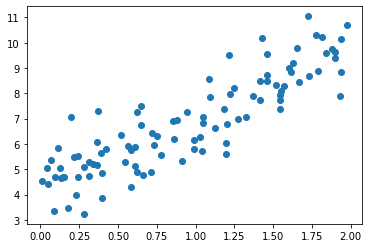

In [150]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
# import pandas as pd
# pd.DataFrame(y)

In [151]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

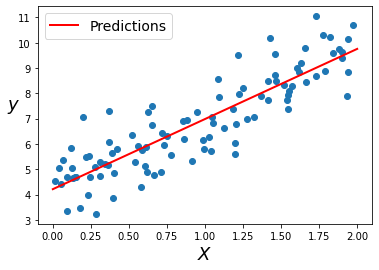

In [152]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [153]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [154]:
X_new.shape

(2, 1)

In [155]:
y_new = linear_reg.predict(X_new)
y_new

array([[4.21509616],
       [9.75532293]])

In [156]:
linear_reg.coef_, linear_reg.intercept_

(array([[2.77011339]]), array([4.21509616]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ 
to 
$$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [157]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

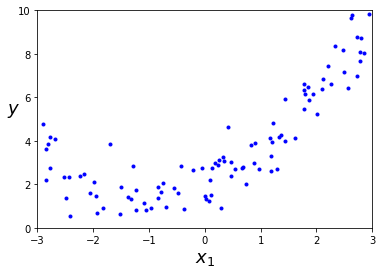

In [158]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [15]:
# import pandas as pd
# pd.DataFrame(y)

Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [159]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [16]:
# X_poly

`X_poly` now contains the original feature of X plus the square of the feature:

In [160]:
print(X[0])
print(X[0]*X[0])


[1.76886782]
[3.12889337]


In [161]:
X_poly[0]

array([1.76886782, 3.12889337])

Fit the model to this extended training data:

In [162]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04630034, 0.5015459 ]]), array([1.99958228]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

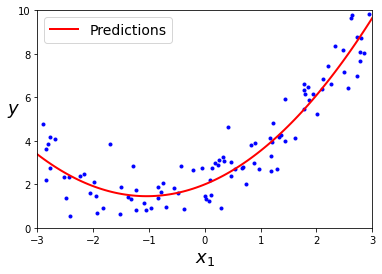

In [163]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# **Ejercicio 1**

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [164]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [165]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.head()

,Number of Units,Manufacturing Cost
0,1.000000,95.066056
1,1.185994,96.531750
2,1.191499,73.661311
3,1.204771,95.566843
4,1.298773,98.777013


In [166]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

### **1. Divide los datos del costo de manufactura. Utiliza la función train_test_split**

#### 1.1. Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada

In [167]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25, random_state=15)

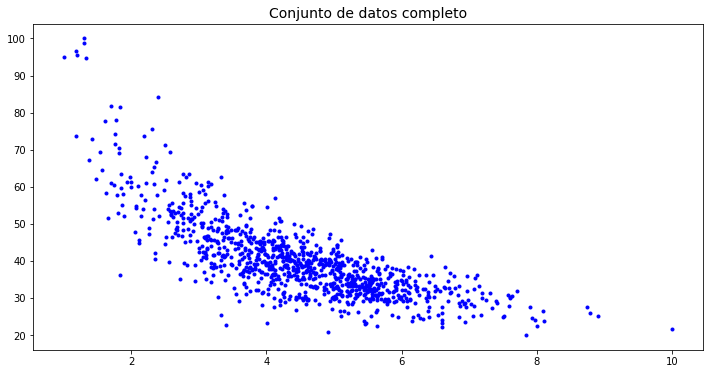

In [168]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(X.values,y,'b.')
plt.title('Conjunto de datos completo', fontsize=14)
plt.show()

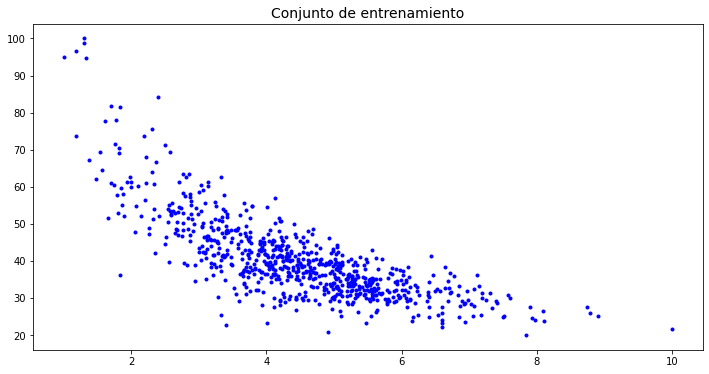

In [169]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtrain.values,ytrain,'b.')
plt.title('Conjunto de entrenamiento', fontsize=14)
plt.show()

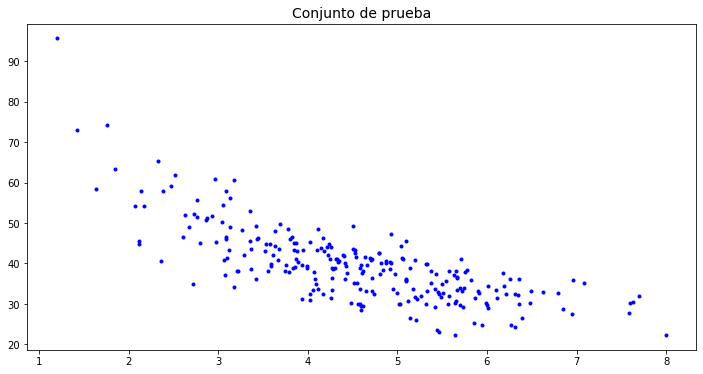

In [170]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.title('Conjunto de prueba', fontsize=14)
plt.show()

### **2. Regresión Lineal**

In [171]:
model = LinearRegression(fit_intercept=True)
model.fit(xtrain, ytrain)

LinearRegression()

In [172]:
xfit = np.linspace(0, xtest.values.max(), 250)
y_pred = model.predict(xtest)

In [173]:
print("Pendiente del modelo:    ", model.coef_[0])
print("Intercepto del modelo:", model.intercept_)

Pendiente del modelo:     -6.164520231187649
Intercepto del modelo: 67.69668548585642


La ecuación generada con regresión lineal se vería de la siguiente manera:

$$ y = -6.164X + 67.69$$

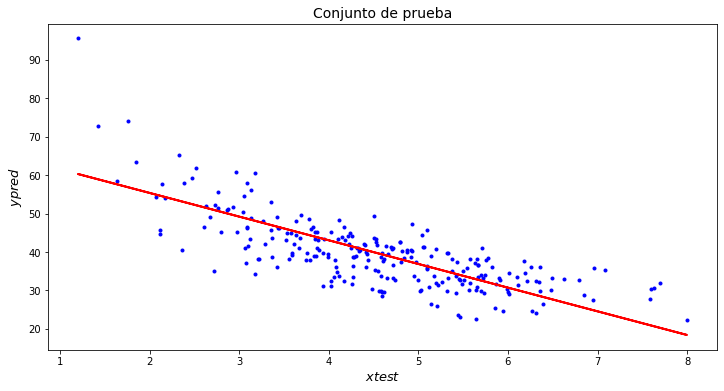

In [27]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.plot(xtest.values, y_pred, "r-", linewidth=2, label="Predictions")
plt.title('Conjunto de prueba', fontsize=14)
plt.xlabel("$xtest$", fontsize=13)
plt.ylabel("$ypred$", rotation=90, fontsize=13)
plt.show()

In [28]:
mae = mean_absolute_error(ytest, y_pred)
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
r2_scoreval = r2_score(ytest, y_pred)
print('Error medio Absoluto (MAE):', round(mae, 3))
print('Root Mean Squared Error:', round(rmse, 3))
print('r2_score',round(r2_scoreval, 3))

Error medio Absoluto (MAE): 4.628
Root Mean Squared Error: 6.136
r2_score 0.564


### **3. Regresión polinomial**

#### Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.

In [93]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X.values)
xtrain_poly, xtest_poly, ytrain_poly, ytest_poly = train_test_split(X_poly, y, test_size=0.25, random_state=15)

In [94]:
model_poly = LinearRegression(fit_intercept=True)
model_poly.fit(xtrain_poly, ytrain_poly)

LinearRegression()

In [214]:
# y_pred = model.predict(poly_features.fit_transform(xtest.values))

In [95]:
print("Coeficientes del modelo:    ", model_poly.coef_)
print("Intercepto del modelo:", model_poly.intercept_)

Coeficientes del modelo:     [-17.03152209   1.1768465 ]
Intercepto del modelo: 90.57908242056516


La ecuación generada con regresión lineal polinomial se vería de la siguiente manera:

$$ y = -17.03X + 1.17X^2 + 90.57$$

In [97]:
X_new=np.linspace(xtest_poly[:,0].min(), xtest_poly[:,0].max(), xtest_poly[:,0].shape[0]).reshape(xtest_poly[:,0].shape[0], 1)
# X_new_poly = poly_features.transform(X_new)
# y_new = model_poly.predict(X_new_poly)
y_new = model_poly.predict(xtest_poly)

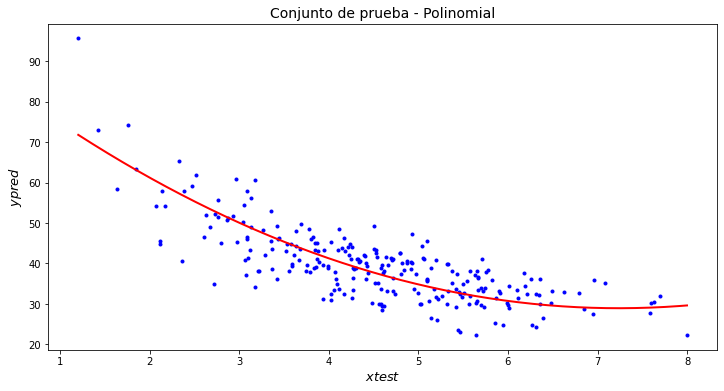

In [51]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest_poly[:,0],ytest_poly,'b.')
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.title('Conjunto de prueba - Polinomial', fontsize=14)
plt.xlabel("$xtest$", fontsize=13)
plt.ylabel("$ypred$", rotation=90, fontsize=13)
plt.show()

In [99]:
mae_poly = mean_absolute_error(ytest_poly, y_new)
rmse_poly = np.sqrt(mean_squared_error(ytest_poly, y_new))
r2_poly = r2_score(ytest_poly, y_new)
print('Error medio Absoluto polinomial (MAE):', round(mae_poly, 3))
print('Root Mean Squared Error Polinomial:', round(rmse_poly, 3))
print('r2_score Polinomial ',round(r2_poly, 3))

Error medio Absoluto polinomial (MAE): 4.36
Root Mean Squared Error Polinomial: 5.595
r2_score Polinomial  0.637


### **4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

#### Ridge

In [72]:
model_ridge = Ridge(alpha=0.3)
model_ridge.fit(xtrain, ytrain)

Ridge(alpha=0.3)

In [73]:
xfit = np.linspace(0, xtest.values.max(), 250)
y_pred_rigde = model_ridge.predict(xtest)

In [74]:
print("Pendiente del modelo Rigde:    ", model_ridge.coef_[0])
print("Intercepto del modelo Ridge:", model_ridge.intercept_)

Pendiente del modelo Rigde:     -6.1631855096315675
Intercepto del modelo Ridge: 67.69073761671514


La ecuación generada con regresión lineal Ridge se vería de la siguiente manera:

$$ y = -6.164X + 67.69$$

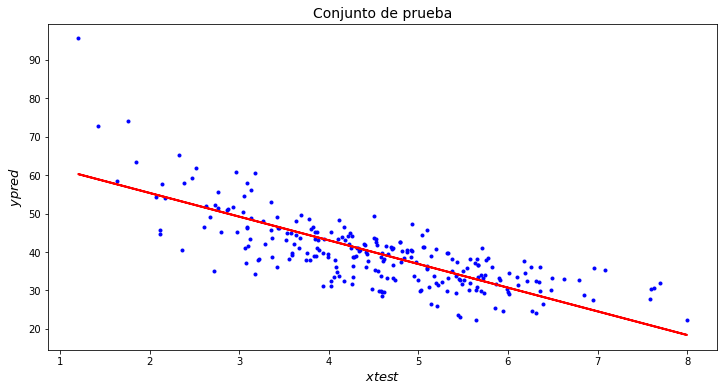

In [75]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.plot(xtest.values, y_pred_rigde, "r-", linewidth=2, label="Predictions")
plt.title('Conjunto de prueba', fontsize=14)
plt.xlabel("$xtest$", fontsize=13)
plt.ylabel("$ypred$", rotation=90, fontsize=13)
plt.show()

In [76]:
mae_ridge = mean_absolute_error(ytest, y_pred_rigde)
rmse_ridge = np.sqrt(mean_squared_error(ytest, y_pred_rigde))
r2_scoreval_ridge = r2_score(ytest, y_pred_rigde)
print('Error medio Absoluto (MAE):', round(mae_ridge, 3))
print('Root Mean Squared Error:', round(rmse_ridge, 3))
print('r2_score',round(r2_scoreval_ridge, 3))

Error medio Absoluto (MAE): 4.627
Root Mean Squared Error: 6.136
r2_score 0.564


#### Lasso

In [80]:
model_lasso = Lasso(alpha=0.7)
model_lasso.fit(xtrain, ytrain)

Lasso(alpha=0.7)

In [81]:
xfit = np.linspace(0, xtest.values.max(), 250)
y_pred_lasso = model_lasso.predict(xtest)

In [82]:
print("Pendiente del modelo Lasso:    ", model_lasso.coef_[0])
print("Intercepto del modelo Lasso:", model_lasso.intercept_)

Pendiente del modelo Lasso:     -5.785533955423472
Intercepto del modelo Lasso: 66.00782329260255


La ecuación generada con regresión lineal Lasso se vería de la siguiente manera:

$$ y = -5.79X + 66.01$$

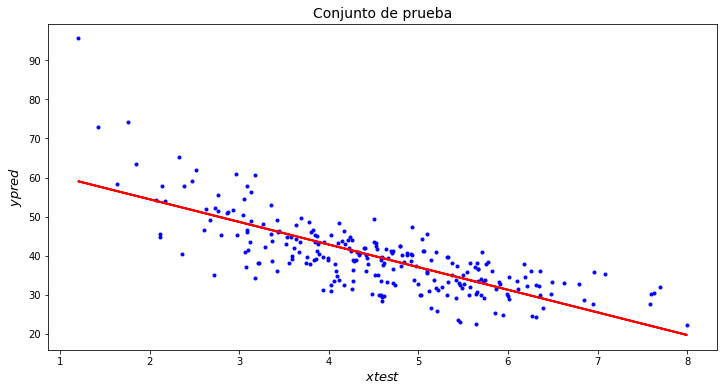

In [83]:
fig, axs = plt.subplots(figsize=(12, 6))
plt.plot(xtest.values,ytest,'b.')
plt.plot(xtest.values, y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.title('Conjunto de prueba', fontsize=14)
plt.xlabel("$xtest$", fontsize=13)
plt.ylabel("$ypred$", rotation=90, fontsize=13)
plt.show()

In [84]:
mae_lasso = mean_absolute_error(ytest, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(ytest, y_pred_lasso))
r2_scoreval_lasso = r2_score(ytest, y_pred_lasso)
print('Error medio Absoluto (MAE):', round(mae_lasso, 3))
print('Root Mean Squared Error:', round(rmse_lasso, 3))
print('r2_score',round(r2_scoreval_lasso, 3))

Error medio Absoluto (MAE): 4.564
Root Mean Squared Error: 6.097
r2_score 0.569


### **5. Finalmente grafica :**

* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

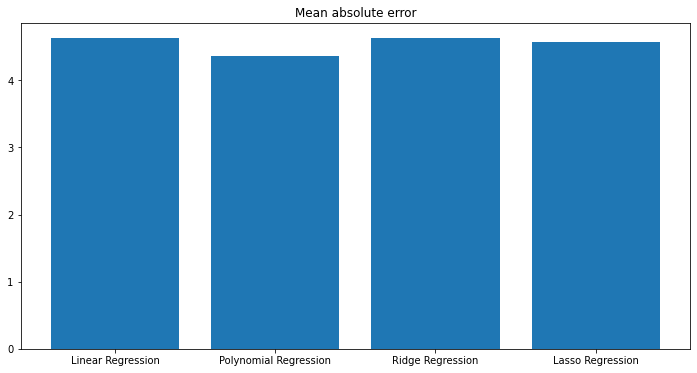

In [113]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [mae, mae_poly, mae_ridge, mae_lasso]
axs.bar(list_names, list_values)
plt.title('Mean absolute error')
plt.show()

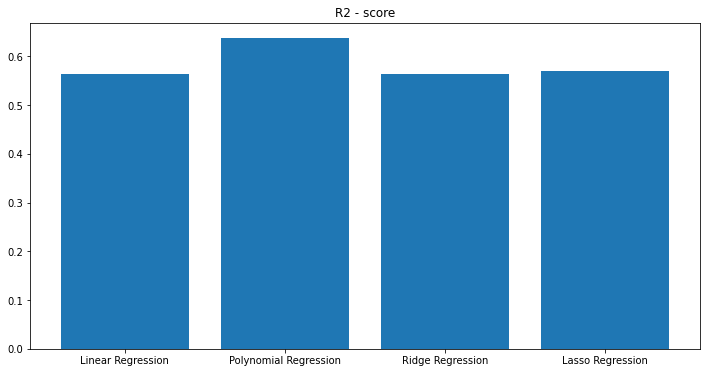

In [114]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [r2_scoreval, r2_poly, r2_scoreval_ridge, r2_scoreval_lasso]
axs.bar(list_names, list_values)
plt.title('R2 - score')
plt.show()

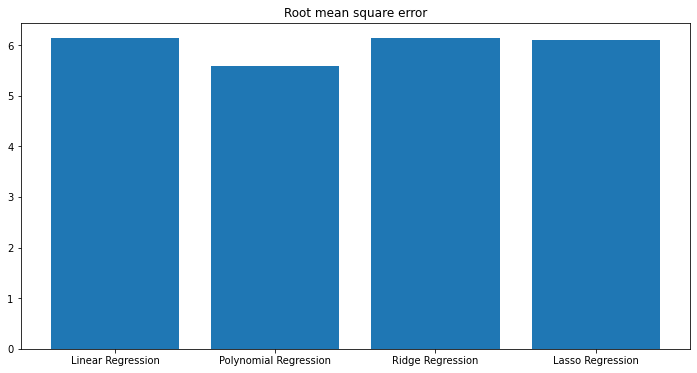

In [115]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [rmse, rmse_poly, rmse_ridge, rmse_lasso]
axs.bar(list_names, list_values)
plt.title('Root mean square error')
plt.show()

## **Conclusiones**

* Para lo métodos `Linear Regression`, `Ridge Regression` y `Lasso Regression` se muestra que no existe una gran diferencia entre los resultados. Esto se debe específicamente a que solo se tiene una variable predictora, así que la penalización de los métodos `Ridge`y `Lasso` no afecta mucho el resultado.
* Al aumentar un grado la variable predictora (pasando a cuadrática) se observa que se tiene un mejor resultado, ya que el ajuste es mucho mejor como se evidencia en el gráfico. El `r2_score` para este método es el más alto, con un valor de `0.637`.

# **Ejercicio 2**
Realiza la regresión polinomial de los siguientes datos:

In [174]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [176]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [177]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


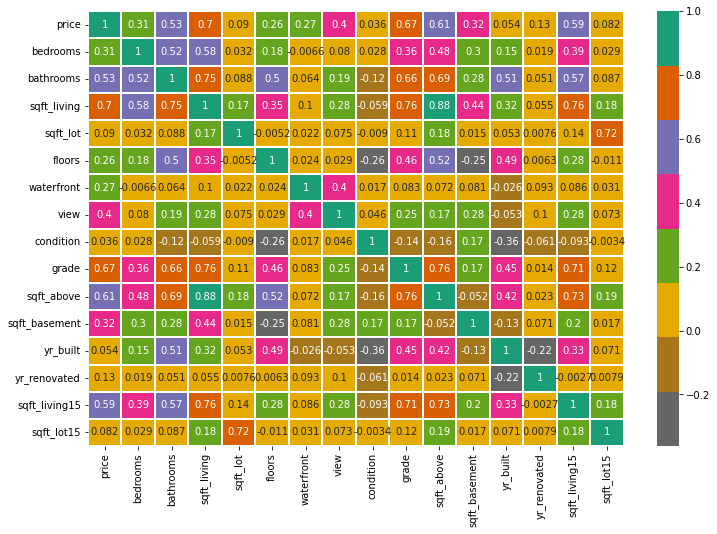

In [178]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [179]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

### **1. Divide los datos. Utiliza la función train_test_split (ya esta en el notebook).**

In [195]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


### **2.Regresión Múltiple Lineal**

In [196]:
model = LinearRegression(fit_intercept=True)
model.fit(X_train, y_train)

LinearRegression()

In [197]:
y_pred = model.predict(X_test)
print("Pendiente del modelo:    ", model.coef_)
print("Intercepto del modelo:", model.intercept_)

Pendiente del modelo:     [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750272e+01  6.02175566e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]
Intercepto del modelo: [6151359.26274203]


La regresión lineal para el primer caso queda de la siguiente manera:
    
$$ y = 6151359.26 - 3.82X_1 + 4.14X_2 + 107.9X_3 + 0.017X_4 + 31691.69X_5 + 555269.02X_6 + 41249.32X_7 + 21222.14X_8 + 119493.21X_9 +47.77X_{10} + 60.02X_{11} - 0.00355X_{12} + 13.26X_{13} + 29.01X_{14} - 0.548X_{15}$$    

In [198]:
mae_lr = mean_absolute_error(y_test, y_pred)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
r2_lr = r2_score(y_test, y_pred)
print('Error medio Absoluto (MAE):', round(mae_lr, 3))
print('Root Mean Squared Error:', round(rmse_lr, 3))
print('r2_score',round(r2_lr, 3))

Error medio Absoluto (MAE): 137480.139
Root Mean Squared Error: 232133.368
r2_score 0.658


### **3. Regresión Múltiple Polinomial**

In [199]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X.values)
xtrain_poly, xtest_poly, ytrain_poly, ytest_poly = train_test_split(X_poly, y, test_size=0.1, random_state=101)

In [200]:
model_poly = LinearRegression(fit_intercept=True)
model_poly.fit(xtrain_poly, ytrain_poly)

LinearRegression()

In [201]:
print("Coeficientes del modelo:    ", model_poly.coef_)
print("Intercepto del modelo:", model_poly.intercept_)

Coeficientes del modelo:     [[ 9.33977838e+05 -1.09318135e+06 -5.20271162e+02 -2.78613294e+01
  -2.07422883e+06 -3.95457844e+06 -2.88590595e+05  5.58659209e+05
   1.09862423e+06 -1.56018437e+02 -3.18425244e+02 -8.59637726e+04
  -2.95354464e+03  3.99966553e+03 -3.40100508e+01  9.57593269e+02
   7.50147546e+03 -1.44068091e+01 -1.85894174e-02  8.57573027e+03
  -1.14979867e+04 -3.07649087e+02 -5.24706113e+03 -5.36690503e+03
  -5.99550523e-01 -1.39986988e+01 -4.67126293e+02 -9.13218472e+00
   1.72757462e+01  2.15707794e-01 -9.63548162e+03  1.49570219e+01
  -1.35565095e-01 -2.59068894e+04  4.33654386e+04  3.83026723e+03
  -1.07671242e+03  2.22965266e+04  1.48607748e+01  1.77220417e+00
   5.03329632e+02 -1.70806207e+01 -1.72870018e+01 -5.60117646e-02
  -1.39614986e+00 -2.56090690e+01  4.83735087e+00  1.60302269e+02
  -1.42698297e+01  1.31168781e+01  2.07317772e+01  8.43011738e+00
  -5.45540555e-01 -1.33987257e+00 -6.69324045e-02  8.46232843e-01
  -2.20051658e+01  3.05124559e-07  4.40853367e-

In [202]:
y_new = model_poly.predict(xtest_poly)
mae_poly = mean_absolute_error(ytest_poly, y_new)
rmse_poly = np.sqrt(mean_squared_error(ytest_poly, y_new))
r2_poly = r2_score(ytest_poly, y_new)
print('Error medio Absoluto polinomial (MAE):', round(mae_poly, 3))
print('Root Mean Squared Error Polinomial:', round(rmse_poly, 3))
print('r2_score Polinomial ',round(r2_poly, 3))

Error medio Absoluto polinomial (MAE): 121314.251
Root Mean Squared Error Polinomial: 186264.348
r2_score Polinomial  0.78


### **4. Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

#### Ridge

In [217]:
model_ridge = Ridge(alpha=5)
model_ridge.fit(X_train, y_train)

Ridge(alpha=5)

In [218]:
print("Pendiente del modelo Rigde:    ", model_ridge.coef_)
print("Intercepto del modelo Ridge:", model_ridge.intercept_)

Pendiente del modelo Rigde:     [[-3.82896171e+04  4.13914306e+04  1.08096090e+02  1.61486363e-02
   3.16788057e+04  5.31220189e+05  4.22492400e+04  2.12424198e+04
   1.19381757e+05  4.79302812e+01  6.01658037e+01 -3.54893952e+03
   1.35365987e+01  2.89064352e+01 -5.47487907e-01]]
Intercepto del modelo Ridge: [6148385.38096804]


In [219]:
y_pred_rigde = model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_rigde)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_rigde))
r2_scoreval_ridge = r2_score(y_test, y_pred_rigde)
print('Error medio Absoluto (MAE):', round(mae_ridge, 3))
print('Root Mean Squared Error:', round(rmse_ridge, 3))
print('r2_score',round(r2_scoreval_ridge, 3))

Error medio Absoluto (MAE): 137533.656
Root Mean Squared Error: 232291.888
r2_score 0.658


#### Lasso

In [220]:
model_lasso = Lasso(alpha=5, max_iter=100000)
model_lasso.fit(X_train, y_train)

/home/yvillamil/anaconda3/envs/ml_projects/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.053e+14, tolerance: 2.572e+11
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=5, max_iter=100000)

In [221]:
print("Coeficientes del modelo Lasso:    ", model_lasso.coef_)
print("Intercepto del modelo Lasso:", model_lasso.intercept_)

Coeficientes del modelo Lasso:     [-3.81944532e+04  4.14447318e+04  2.91745187e+02  1.70981121e-02
  3.16689403e+04  5.51941446e+05  4.12775360e+04  2.12083740e+04
  1.19486323e+05 -1.35954221e+02 -1.23525585e+02 -3.55064163e+03
  1.32733439e+01  2.90029354e+01 -5.48149962e-01]
Intercepto del modelo Lasso: [6150963.51853755]


In [222]:
y_pred_lasso = model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
r2_scoreval_lasso = r2_score(y_test, y_pred_lasso)
print('Error medio Absoluto (MAE):', round(mae_lasso, 3))
print('Root Mean Squared Error:', round(rmse_lasso, 3))
print('r2_score',round(r2_scoreval_lasso, 3))

Error medio Absoluto (MAE): 137482.302
Root Mean Squared Error: 232139.173
r2_score 0.658


### **5. Finalmente grafica :**

* MAE (de los cuatro métodos)
* R2 (de los cuatro métodos)

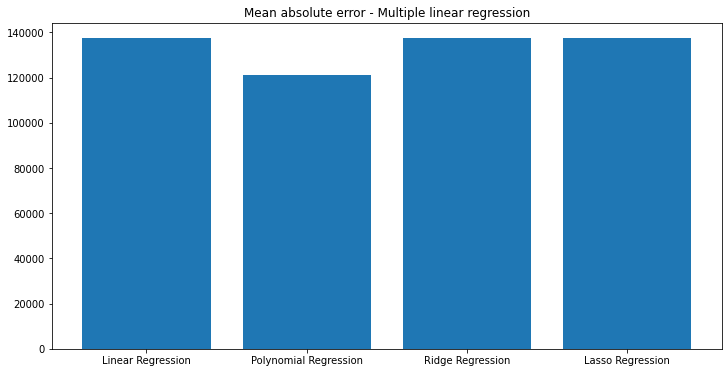

In [142]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [mae_lr, mae_poly, mae_ridge, mae_lasso]
axs.bar(list_names, list_values)
plt.title('Mean absolute error - Multiple linear regression')
plt.show()

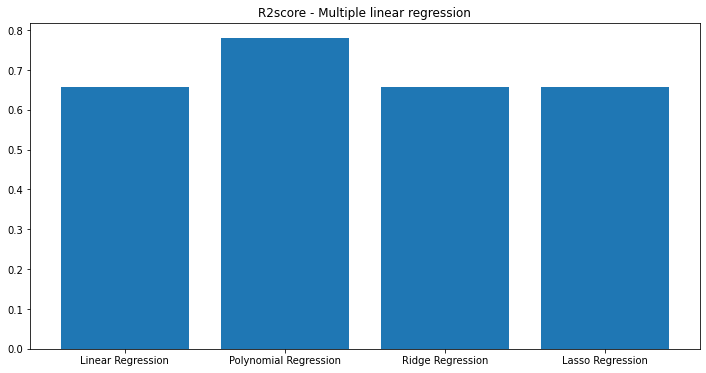

In [143]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [r2_lr, r2_poly, r2_scoreval_ridge, r2_scoreval_lasso]
axs.bar(list_names, list_values)
plt.title('R2score - Multiple linear regression')
plt.show()

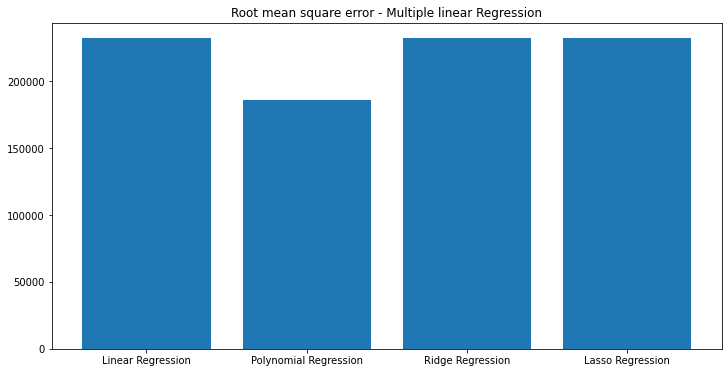

In [144]:
fig, axs = plt.subplots(figsize=(12, 6))
list_names = ['Linear Regression', 'Polynomial Regression', 'Ridge Regression', 'Lasso Regression']
list_values = [rmse_lr, rmse_poly, rmse_ridge, rmse_lasso]
axs.bar(list_names, list_values)
plt.title('Root mean square error - Multiple linear Regression')
plt.show()

### **Conclusiones**

* Se evidencia que cuando se incrementan los valores de los grados para las variables predictoras, el valor del `r2_score` incrementa significativamente comparado con la `Linear Regression`, pasando de `0.658` a `0.78`.
* Nuevamente, se observa que probando con valores de `alpha` altos para los métodos `Lasso` y `Ridge` con mayor penalización, los valores de las métricas cambian con respecto a la `Linear Regression`. Esto ùede suceder por la naturaleza de los datos. Por esto se hace importante jugar con los hiperparámetros de los modelos y encontrar el óptimo.
* Las diferencias de las regresiones normales (no polinómicas) son bajas, menores al `1%`. 